In [203]:
##imports

import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import sys

In [211]:
## generate locations of markers

mode='dome'
if(mode=='full_sphere'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 18)
    lin_theta = np.linspace(-0.45*np.pi, 0.45*np.pi, 10) # if we go up to pi/2 markers will overlap at poles
elif (mode=='dome'):
    r=2
    lin_phi = np.linspace(0, 2*np.pi, 18)
    lin_theta = np.linspace(15/180*np.pi, 0.5*np.pi-15/180*np.pi, 7)
else:
    raise BaseException("none of the options chosen")

_theta, _phi = np.meshgrid(lin_theta, lin_phi)
x = (r*np.cos(_theta)*np.cos(_phi)).flatten()
y = (r*np.cos(_theta)*np.sin(_phi)).flatten()
z = (r*np.sin(_theta)).flatten()
theta=_theta.flatten()
phi=_phi.flatten()

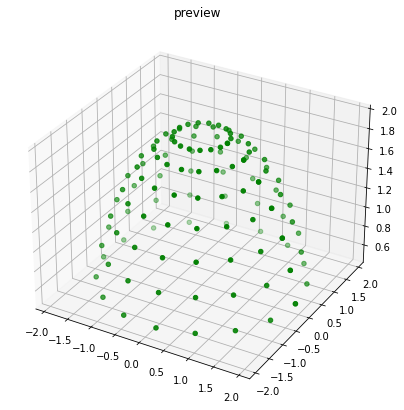

In [212]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("preview")
 
# show plot
plt.show()

In [206]:
## import XML tree from file

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse("/home/armin/catkin_ws/src/arc/gazebo/sim/worlds/empty_backup.world", parser)
world_node=tree.xpath("//world")[0]

In [207]:
## generate XML for markers

num_markers = len(x)
print('There are {} markers to be positioned in the world'.format(num_markers))

for i in  range(num_markers):
    include_node=etree.Element("include")
    uri_node = etree.Element("uri")
    pose_node = etree.Element("pose")
    uri_node.text='model://marker_{}'.format(i)
    pose_node.text='{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(x[i], y[i], z[i], 0, np.pi/2-theta[i], phi[i])
    include_node.append(uri_node)
    include_node.append(pose_node)
    world_node.append(include_node)




There are 126 markers to be positioned in the world


In [208]:
## Export XML
text_file = open("markers.world", "w")
str=etree.tostring(tree, pretty_print=True).decode(sys.stdout.encoding)
text_file.write(str)
text_file.close()
